<a href="https://colab.research.google.com/github/bishwajit02/Pytorch-Tutorial-Youtube/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Neural Network using Iris Dataset**

In [1]:
import torch
import torch.nn as nn # nn stands for neural network
import torch.nn.functional as F
import numpy as np


In [2]:
# Create a model class that inherits nn.Module

class Model(nn.Module):
  # Input Layers (4 features)
  # --> Then to hidden layers --> Output (3 classes of Iris flower)

# The 'def __init__' function sets up the class
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  # Instantiate the model
    self.fc1 = nn.Linear(in_features, h1)   #fc - Fully Connected (Important for Neural Network)
    self.fc2 = nn.Linear(h1, h2)  # The previous result h1 is now connected with the new layer h2
    self.out = nn.Linear(h2, out_features)  # h2 is the last layer so it's directly connected to the output

  def forward(self, x):
    x = F.relu(self.fc1(x))  # relu - Rectified Linear Unit, More - https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU,
    # If the input is positive (greater than zero): ReLU lets the input pass through unchanged.
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [3]:
# Pick a manual seed for randomization - helps with reproductibility
torch.manual_seed(42)

# Create an instance for the model

model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [6]:
df.tail()
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
# Changing last column to number

df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 1.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

<ipython-input-7-4f23bf7e11d6>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace('Virginica', 2.0)


In [8]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Set X and y

X = df.drop('variety', axis=1)
y = df['variety']

In [10]:
# Convert this into numpy arrays

X = X.values
y = y.values



In [11]:
# Need SciKitLearn to perform Train-Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size = 0.2 means 20% of total data will be used to test the model, the rest 80% is for training the model

In [12]:
# Converting the variables into tensors

# FloatTensor means decimal number (32 bits)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# LongTensor means integer number (64 btis)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Setting up the criterion | How far off the predictions are from the data

# CrossEntropyLoss is a way to measure how bad our computer's guess (the predicted probabilities) is compared to the real answer (the true label)
criterion = nn.CrossEntropyLoss()

# Choose an Optimizer, learning rate
# If the error doesn't go down after a bunch of iteration (epochs), lower the learning rate (lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
# Training the model
# Epochs = one complete pass through your entire training dataset during the training process

epochs = 300
losses = []

for i in range(epochs):
  # Go forward and give a prediction
  y_pred = model.forward(X_train)  # Get predicted data by passing it through the training data

  # Measure the loss
  loss = criterion(y_pred, y_train)

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and Loss: {loss}')

  # Back propagation: Take the error rate of the forward propagation and feed it back to reduce the error rate and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 0.12253288179636002
Epoch: 10 and Loss: 0.11803863197565079
Epoch: 20 and Loss: 0.11394982039928436
Epoch: 30 and Loss: 0.11023116111755371
Epoch: 40 and Loss: 0.10682593286037445
Epoch: 50 and Loss: 0.10369908809661865
Epoch: 60 and Loss: 0.10082250088453293
Epoch: 70 and Loss: 0.09817191958427429
Epoch: 80 and Loss: 0.09572602808475494
Epoch: 90 and Loss: 0.09347318857908249
Epoch: 100 and Loss: 0.0913943350315094
Epoch: 110 and Loss: 0.08946778625249863
Epoch: 120 and Loss: 0.08767851442098618
Epoch: 130 and Loss: 0.08601889759302139
Epoch: 140 and Loss: 0.08447761833667755
Epoch: 150 and Loss: 0.08304230868816376
Epoch: 160 and Loss: 0.08170080184936523
Epoch: 170 and Loss: 0.08044464141130447
Epoch: 180 and Loss: 0.07926665246486664
Epoch: 190 and Loss: 0.07816138863563538
Epoch: 200 and Loss: 0.07712487876415253
Epoch: 210 and Loss: 0.07615064829587936
Epoch: 220 and Loss: 0.07523246854543686
Epoch: 230 and Loss: 0.07436936348676682
Epoch: 240 and Loss: 0.07355

Text(0.5, 0, 'Iteration')

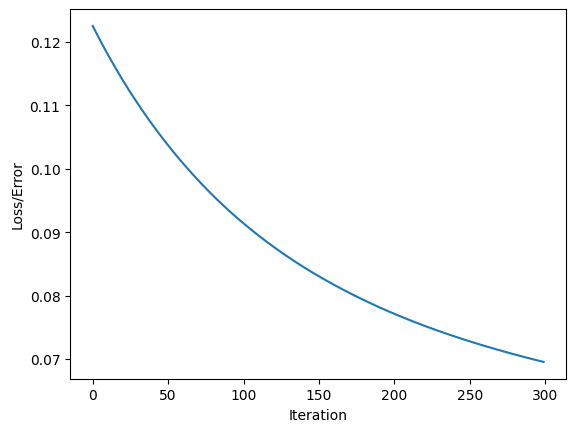

In [20]:
# Graph the thing

plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Iteration")

In [21]:
# Evaluate model on test dataset

# This will stop the back propagation
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [22]:
loss

tensor(0.0779)

In [28]:
# This one is to check how the model did on test data vs train data

correct = 0

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    elif y_test[i] == 2:
      x = "Virginica"

    # To tell what kind of flower it is
    print(f"{i+1}, {str(y_val)} \t {x} \t {y_val.argmax().item()}")

    # Correct or not!
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We've got {correct} correct!")

1, tensor([-1.7194,  5.4374,  2.3106]) 	 Versicolor 	 1
2, tensor([ 8.2707,  2.7411, -7.0731]) 	 Setosa 	 0
3, tensor([-13.5769,   0.5590,  12.3479]) 	 Virginica 	 2
4, tensor([-1.8850,  5.2110,  2.4338]) 	 Versicolor 	 1
5, tensor([-2.0059,  5.8020,  2.5924]) 	 Versicolor 	 1
6, tensor([ 7.6950,  2.6219, -6.5510]) 	 Setosa 	 0
7, tensor([ 1.1462,  5.5563, -0.2481]) 	 Versicolor 	 1
8, tensor([-5.6730,  3.9175,  5.6579]) 	 Virginica 	 2
9, tensor([-3.8155,  4.1716,  4.0483]) 	 Versicolor 	 1
10, tensor([0.5305, 5.9340, 0.3531]) 	 Versicolor 	 1
11, tensor([-4.7074,  4.1991,  4.8333]) 	 Virginica 	 2
12, tensor([ 7.3292,  2.2331, -6.2456]) 	 Setosa 	 0
13, tensor([ 8.2689,  2.5975, -7.0837]) 	 Setosa 	 0
14, tensor([ 7.4272,  2.2711, -6.3331]) 	 Setosa 	 0
15, tensor([ 7.9671,  2.4805, -6.8146]) 	 Setosa 	 0
16, tensor([-1.4565,  5.7829,  2.1038]) 	 Versicolor 	 1
17, tensor([-8.9784,  1.9894,  8.4121]) 	 Virginica 	 2
18, tensor([0.2755, 5.8284, 0.5800]) 	 Versicolor 	 1
19, tensor([-1

In [29]:
# Trying new data on the model

new_iris = torch.tensor([4.6, 3.7, 1.9, 0.2])

In [30]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.1927,  2.3323, -6.1111])


In [32]:
print(f"{i+1}, {str(new_iris)} \t {x} \t {new_iris.argmax().item()}")

30, tensor([4.6000, 3.7000, 1.9000, 0.2000]) 	 Setosa 	 0


In [35]:
another = torch.tensor([6.2,	3.4,	5.4,	2.3])


In [36]:
with torch.no_grad():
  print(model(another))

tensor([-6.8658,  2.8849,  6.6229])


In [38]:
print(f" {str(another)} \t {x} \t {another.argmax().item()}")

 tensor([6.2000, 3.4000, 5.4000, 2.3000]) 	 Setosa 	 0
